**Langkah 1: Instalasi Library yang Diperlukan**

In [1]:
# Langkah 1: Instalasi Library yang Diperlukan
!pip install google-play-scraper
!pip install nltk
!pip install Sastrawi
!pip install wordcloud
!pip install seaborn
!pip install tensorflow
!pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.3 MB/s eta 0:00:00


Dokumentasi:
- Pada bagian ini, kami menginstal semua library yang diperlukan untuk proyek ini, termasuk library untuk scraping data (google-play-scraper), pemrosesan teks (nltk, Sastrawi), visualisasi (wordcloud, seaborn), serta model machine learning dan deep learning (tensorflow, scikit-learn).



**Langkah 2: Mengimpor Library**

In [2]:
# Langkah 2: Mengimpor Library yang Dibutuhkan
from google_play_scraper import Sort, reviews
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout, Conv1D, MaxPooling1D, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences


Dokumentasi:

- Pada langkah ini, kami mengimpor semua library yang diperlukan untuk proses scraping data, pemrosesan teks, pembuatan model, dan evaluasi hasil. Beberapa library penting seperti nltk digunakan untuk pengolahan teks, dan tensorflow digunakan untuk membangun model deep learning.



**Langkah 3: Mengambil Ulasan Aplikasi Shopee dari Google Play Store**

In [3]:
# Langkah 3: Mengambil Ulasan Aplikasi Shopee dari Google Play Store
result, continuation_token = reviews(
    'com.shopee.id',  # Nama package aplikasi Shopee
    lang='id',  # Bahasa Indonesia
    country='id',  # Negara Indonesia
    sort=Sort.MOST_RELEVANT,  # Mengurutkan berdasarkan ulasan yang paling relevan
    count=12000,  # Mengambil 12.000 ulasan
    filter_score_with=None  # Tidak ada filter pada skor, mengambil semua rating dari 1 hingga 5
)

# Menyimpan data hasil scraping
df_busu = pd.DataFrame(np.array(result), columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,81d89fbf-58a9-447d-b95c-fc34d6a2bf70,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi ini sudah beda tidak seperti dulu,ban...",4,231,3.44.26,2025-03-07 21:59:45,Hi kak Nuraini Syafitri maaf ya buat ga nyaman...,2025-03-07 23:08:00,3.44.26
1,9361e1fb-9ab6-4fd7-8b05-bd93d5ffb15d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Dari semua aplikasi online shop shopee is the ...,5,26,3.44.26,2025-03-08 01:41:02,"Hai kak Lies Murtiana , mksih ya buat bintang ...",2025-03-08 02:18:48,3.44.26
2,7aafa51e-c4b9-4834-bdb1-9355e2b18d94,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kecewa belanja di aplikasi ini. Sebenarnya ini...,1,113,3.44.25,2025-03-09 08:02:04,None,NaT,3.44.25
3,5e6ee949-eb8e-4475-86b4-e1fc25a25ca7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi shoppe sekarang banyak bug nya, masa ...",2,123,3.44.26,2025-03-08 01:46:33,Hi kak mbah ver maaf untuk kendalanya. Aku ban...,2025-03-08 03:44:35,3.44.26
4,b8aa5030-a5e5-40a6-92be-88c6debbd602,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,akhir akhir ini setiap mau lakuin payment pake...,2,88,3.44.26,2025-03-08 07:16:09,"Hai kak fatyaaa 21 , maaf buat ga nyaman, aku ...",2025-03-08 09:24:25,3.44.26


Dokumentasi:
- Pada langkah ini, kami menggunakan google-play-scraper untuk mengambil 12.000 ulasan aplikasi Shopee dalam bahasa Indonesia. Data yang diambil kemudian disimpan dalam sebuah DataFrame (df_busu) agar lebih mudah untuk dianalisis.



**Langkah 4: Pelabelan Data Berdasarkan Skor**

In [4]:
# Langkah 4: Pelabelan Data Berdasarkan Skor
def label_score(score):
    if score < 3:
        return 'Negatif'
    elif score == 3:
        return 'Netral'
    elif score >= 4:
        return 'Positif'

my_df = df_busu[['userName', 'score', 'at', 'content']]
my_df['Label'] = my_df['score'].apply(label_score)

my_df.head(50)


<ipython-input-4-35797968b7a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df['score'].apply(label_score)


,userName,score,at,content,Label
0,Pengguna Google,4,2025-03-07 21:59:45,"Aplikasi ini sudah beda tidak seperti dulu,ban...",Positif
1,Pengguna Google,5,2025-03-08 01:41:02,Dari semua aplikasi online shop shopee is the ...,Positif
2,Pengguna Google,1,2025-03-09 08:02:04,Kecewa belanja di aplikasi ini. Sebenarnya ini...,Negatif
3,Pengguna Google,2,2025-03-08 01:46:33,"Aplikasi shoppe sekarang banyak bug nya, masa ...",Negatif
4,Pengguna Google,2,2025-03-08 07:16:09,akhir akhir ini setiap mau lakuin payment pake...,Negatif
5,Pengguna Google,1,2025-03-09 02:35:43,"pengiriman menggunakan spx sangat lambat , tid...",Negatif
6,Pengguna Google,3,2025-03-09 02:46:43,Sekian lama memakai aplikasi shopee baru kali ...,Netral
7,Pengguna Google,1,2025-03-09 06:08:19,Dari aplikasi sih udah bagus... TAPI IKLAN MU ...,Negatif
8,Pengguna Google,5,2025-03-08 02:33:33,(Saran dari saya ya min) disaat paket sudah di...,Positif
9,Pengguna Google,1,2025-03-09 07:59:55,"Saran saja buat shopee, sebaiknya untuk klik p...",Negatif


Penjelasan:

Dataset telah dilabeli dengan tiga kelas: Negatif, Netral, dan Positif berdasarkan rating:
- Skor < 3 → Negatif
- Skor = 3 → Netral
- Skor = 4 atau 5 → Positif

**Langkah 5: Pembersihan Data**

In [5]:
# Langkah 5: Pembersihan Data
my_df.dropna(subset=['Label'], inplace=True)  # Menghapus baris yang tidak memiliki label
my_df.isnull().sum()


<ipython-input-5-5ed7742b964b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.dropna(subset=['Label'], inplace=True)  # Menghapus baris yang tidak memiliki label


,0
userName,0
score,0
at,0
content,0
Label,0


Dokumentasi:
- Langkah ini bertujuan untuk memastikan bahwa data yang digunakan sudah bersih dan tidak ada nilai yang hilang. Semua baris tanpa label akan dihapus.

**Langkah 6 : Pemrosesan Teks - Case Folding dan Pembersihan**

In [6]:
# Langkah 6: Pemrosesan Teks - Case Folding dan Pembersihan
my_df['content_clean'] = my_df['content'].str.lower()  # Mengubah semua teks menjadi huruf kecil
my_df['content_clean'] = my_df['content_clean'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x))


<ipython-input-6-0fd7ff2452a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['content_clean'] = my_df['content'].str.lower()  # Mengubah semua teks menjadi huruf kecil
<ipython-input-6-0fd7ff2452a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['content_clean'] = my_df['content_clean'].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", x))


Dokumentasi:
- Case folding dilakukan untuk mengubah seluruh teks menjadi huruf kecil agar konsisten. Kemudian, karakter-karakter non-alfanumerik dan URL dihapus menggunakan regular expressions.

**Langkah 7 : Penghapusan Stopword**

In [8]:
# Langkah 7: Mengunduh Stopwords dan Menghapusnya dari Teks
import nltk
nltk.download('stopwords')  # Pastikan stopwords sudah diunduh

from nltk.corpus import stopwords

# Definisikan stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Menghapus stopwords dari teks
my_df['content_clean'] = my_df['content_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

my_df.head(50)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-8-3d4a2bd6fca5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['content_clean'] = my_df['content_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


,userName,score,at,content,Label,content_clean
0,Pengguna Google,4,2025-03-07 21:59:45,"Aplikasi ini sudah beda tidak seperti dulu,ban...",Positif,aplikasi beda dulubanyak nya perubahanagak ber...
1,Pengguna Google,5,2025-03-08 01:41:02,Dari semua aplikasi online shop shopee is the ...,Positif,aplikasi online shop shopee is the best oneapl...
2,Pengguna Google,1,2025-03-09 08:02:04,Kecewa belanja di aplikasi ini. Sebenarnya ini...,Negatif,kecewa belanja aplikasi aplikasi belanja penge...
3,Pengguna Google,2,2025-03-08 01:46:33,"Aplikasi shoppe sekarang banyak bug nya, masa ...",Negatif,aplikasi shoppe bug nya buka aplikasinya langs...
4,Pengguna Google,2,2025-03-08 07:16:09,akhir akhir ini setiap mau lakuin payment pake...,Negatif,lakuin payment pake shopeepay loading bener be...
5,Pengguna Google,1,2025-03-09 02:35:43,"pengiriman menggunakan spx sangat lambat , tid...",Negatif,pengiriman spx lambat cepat kirim buruknya sis...
6,Pengguna Google,3,2025-03-09 02:46:43,Sekian lama memakai aplikasi shopee baru kali ...,Netral,sekian memakai aplikasi shopee kali bikin kece...
7,Pengguna Google,1,2025-03-09 06:08:19,Dari aplikasi sih udah bagus... TAPI IKLAN MU ...,Negatif,aplikasi sih udah bagus iklan mu licik dimana ...
8,Pengguna Google,5,2025-03-08 02:33:33,(Saran dari saya ya min) disaat paket sudah di...,Positif,saran ya min disaat paket ditangan kurir alang...
9,Pengguna Google,1,2025-03-09 07:59:55,"Saran saja buat shopee, sebaiknya untuk klik p...",Negatif,saran shopee klik pesanan selesai opsi klik 2x...


Penjelasan:

- Menggunakan stopwords untuk menghapus kata-kata yang tidak penting (seperti "yang", "di", "dari").

**Langkah 8 : Tokenisasi**

In [9]:
# Mengunduh resource 'punkt' dari NLTK
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
import nltk
nltk.data.path.append('/root/nltk_data')  # Menambahkan path yang tepat

# Menghapus cache dan mendownload ulang data yang dibutuhkan
nltk.download('punkt', force=True)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
# Langkah 8: Tokenisasi
nltk.download('punkt')
my_df['tokens'] = my_df['content_clean'].apply(lambda x: nltk.word_tokenize(x))

my_df.head(50)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-12-dca38c43a688>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['tokens'] = my_df['content_clean'].apply(lambda x: nltk.word_tokenize(x))


,userName,score,at,content,Label,content_clean,tokens
0,Pengguna Google,4,2025-03-07 21:59:45,"Aplikasi ini sudah beda tidak seperti dulu,ban...",Positif,aplikasi beda dulubanyak nya perubahanagak ber...,"[aplikasi, beda, dulubanyak, nya, perubahanaga..."
1,Pengguna Google,5,2025-03-08 01:41:02,Dari semua aplikasi online shop shopee is the ...,Positif,aplikasi online shop shopee is the best oneapl...,"[aplikasi, online, shop, shopee, is, the, best..."
2,Pengguna Google,1,2025-03-09 08:02:04,Kecewa belanja di aplikasi ini. Sebenarnya ini...,Negatif,kecewa belanja aplikasi aplikasi belanja penge...,"[kecewa, belanja, aplikasi, aplikasi, belanja,..."
3,Pengguna Google,2,2025-03-08 01:46:33,"Aplikasi shoppe sekarang banyak bug nya, masa ...",Negatif,aplikasi shoppe bug nya buka aplikasinya langs...,"[aplikasi, shoppe, bug, nya, buka, aplikasinya..."
4,Pengguna Google,2,2025-03-08 07:16:09,akhir akhir ini setiap mau lakuin payment pake...,Negatif,lakuin payment pake shopeepay loading bener be...,"[lakuin, payment, pake, shopeepay, loading, be..."
5,Pengguna Google,1,2025-03-09 02:35:43,"pengiriman menggunakan spx sangat lambat , tid...",Negatif,pengiriman spx lambat cepat kirim buruknya sis...,"[pengiriman, spx, lambat, cepat, kirim, burukn..."
6,Pengguna Google,3,2025-03-09 02:46:43,Sekian lama memakai aplikasi shopee baru kali ...,Netral,sekian memakai aplikasi shopee kali bikin kece...,"[sekian, memakai, aplikasi, shopee, kali, biki..."
7,Pengguna Google,1,2025-03-09 06:08:19,Dari aplikasi sih udah bagus... TAPI IKLAN MU ...,Negatif,aplikasi sih udah bagus iklan mu licik dimana ...,"[aplikasi, sih, udah, bagus, iklan, mu, licik,..."
8,Pengguna Google,5,2025-03-08 02:33:33,(Saran dari saya ya min) disaat paket sudah di...,Positif,saran ya min disaat paket ditangan kurir alang...,"[saran, ya, min, disaat, paket, ditangan, kuri..."
9,Pengguna Google,1,2025-03-09 07:59:55,"Saran saja buat shopee, sebaiknya untuk klik p...",Negatif,saran shopee klik pesanan selesai opsi klik 2x...,"[saran, shopee, klik, pesanan, selesai, opsi, ..."


Penjelasan:

- Tokenisasi adalah proses memecah teks menjadi kata-kata terpisah. Dalam hal ini, kita menggunakan nltk.word_tokenize untuk melakukannya.


**Langkah 9: Stemming menggunakan Sastrawi**

Stemming adalah langkah untuk mengubah kata-kata menjadi bentuk dasarnya.

In [14]:
# Langkah 9: Stemming Menggunakan Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()
my_df['content_stemmed'] = my_df['content_clean'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

my_df.head(50)


<ipython-input-14-5175707d47c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['content_stemmed'] = my_df['content_clean'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))


,userName,score,at,content,Label,content_clean,tokens,content_stemmed
0,Pengguna Google,4,2025-03-07 21:59:45,"Aplikasi ini sudah beda tidak seperti dulu,ban...",Positif,aplikasi beda dulubanyak nya perubahanagak ber...,"[aplikasi, beda, dulubanyak, nya, perubahanaga...",aplikasi beda dulubanyak nya perubahanagak mas...
1,Pengguna Google,5,2025-03-08 01:41:02,Dari semua aplikasi online shop shopee is the ...,Positif,aplikasi online shop shopee is the best oneapl...,"[aplikasi, online, shop, shopee, is, the, best...",aplikasi online shop shopee is the best oneapl...
2,Pengguna Google,1,2025-03-09 08:02:04,Kecewa belanja di aplikasi ini. Sebenarnya ini...,Negatif,kecewa belanja aplikasi aplikasi belanja penge...,"[kecewa, belanja, aplikasi, aplikasi, belanja,...",kecewa belanja aplikasi aplikasi belanja kemba...
3,Pengguna Google,2,2025-03-08 01:46:33,"Aplikasi shoppe sekarang banyak bug nya, masa ...",Negatif,aplikasi shoppe bug nya buka aplikasinya langs...,"[aplikasi, shoppe, bug, nya, buka, aplikasinya...",aplikasi shoppe bug nya buka aplikasi langsung...
4,Pengguna Google,2,2025-03-08 07:16:09,akhir akhir ini setiap mau lakuin payment pake...,Negatif,lakuin payment pake shopeepay loading bener be...,"[lakuin, payment, pake, shopeepay, loading, be...",lakuin payment pake shopeepay loading bener be...
5,Pengguna Google,1,2025-03-09 02:35:43,"pengiriman menggunakan spx sangat lambat , tid...",Negatif,pengiriman spx lambat cepat kirim buruknya sis...,"[pengiriman, spx, lambat, cepat, kirim, burukn...",kirim spx lambat cepat kirim buruk sistem shop...
6,Pengguna Google,3,2025-03-09 02:46:43,Sekian lama memakai aplikasi shopee baru kali ...,Netral,sekian memakai aplikasi shopee kali bikin kece...,"[sekian, memakai, aplikasi, shopee, kali, biki...",sekian pakai aplikasi shopee kali bikin kecewa...
7,Pengguna Google,1,2025-03-09 06:08:19,Dari aplikasi sih udah bagus... TAPI IKLAN MU ...,Negatif,aplikasi sih udah bagus iklan mu licik dimana ...,"[aplikasi, sih, udah, bagus, iklan, mu, licik,...",aplikasi sih udah bagus iklan mu licik mana ik...
8,Pengguna Google,5,2025-03-08 02:33:33,(Saran dari saya ya min) disaat paket sudah di...,Positif,saran ya min disaat paket ditangan kurir alang...,"[saran, ya, min, disaat, paket, ditangan, kuri...",saran ya min saat paket tang kurir alangkah ba...
9,Pengguna Google,1,2025-03-09 07:59:55,"Saran saja buat shopee, sebaiknya untuk klik p...",Negatif,saran shopee klik pesanan selesai opsi klik 2x...,"[saran, shopee, klik, pesanan, selesai, opsi, ...",saran shopee klik pesan selesai opsi klik 2x s...


Penjelasan:

- Menggunakan Sastrawi untuk stemming bahasa Indonesia. Misalnya, "berlari" akan diubah menjadi "lari".

**Langkah 10: Membagi Data Menjadi Training dan Testing**

Sekarang, kita akan membagi dataset menjadi dua bagian: training dan testing.

In [15]:
# Langkah 10: Membagi Data Menjadi Training dan Testing
X = my_df['content_stemmed']
y = my_df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Penjelasan:

- 80% untuk training set dan 20% untuk testing set digunakan untuk melatih dan menguji model.

**Langkah 11: Ekstraksi Fitur (TF-IDF)**

Kita akan menggunakan TF-IDF untuk mengubah teks menjadi representasi numerik yang digunakan untuk pelatihan model.

In [40]:
# Pastikan X_train dan X_test berisi teks yang telah diproses
X_train = my_df['content_stemmed']  # Pastikan kolom ini berisi teks yang telah di-stemming
X_test = my_df['content_stemmed']  # Sama untuk X_test

# Mengimpor TfidfVectorizer dari sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# Langkah 11: Ekstraksi Fitur - TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Menyaring 5000 fitur terpenting
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Periksa hasil setelah transformasi
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)


(12000, 5000)
(12000, 5000)


Penjelasan:

- TF-IDF (Term Frequency-Inverse Document Frequency) adalah metode untuk mengubah teks menjadi representasi numerik yang dapat digunakan untuk pelatihan model.
- max_features=5000 memastikan hanya 5000 fitur terpenting yang dipilih untuk analisis.


**Langkah 12: Melatih Model Deep Learning (LSTM)**

Sekarang, kita akan melatih model menggunakan LSTM untuk analisis sentimen.

In [18]:
print(type(X))  # Seharusnya <class 'numpy.ndarray'>
print(type(y))  # Seharusnya <class 'numpy.ndarray'>
print(X.shape)  # Seharusnya (jumlah_samples, panjang_sequence)
print(y.shape)  # Seharusnya (jumlah_samples,)


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
(12000,)
(12000,)


In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(my_df['content_stemmed'])
X = tokenizer.texts_to_sequences(my_df['content_stemmed'])
X = pad_sequences(X, padding='post', maxlen=100)


In [20]:
encoder = LabelEncoder()
y = encoder.fit_transform(my_df['Label'])


In [21]:
print(f"X: {X.shape}, y: {y.shape}")
print(f"X dtype: {X.dtype}, y dtype: {y.dtype}")


X: (12000, 100), y: (12000,)
X dtype: int32, y dtype: int64


In [22]:
X = np.array(X)
y = np.array(y)


In [23]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_lstm.add(Bidirectional(LSTM(64, return_sequences=True)))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(3, activation='softmax'))

model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 61s 347ms/step - accuracy: 0.4581 - loss: 0.9635 - val_accuracy: 0.6821 - val_loss: 0.8023
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 73s 286ms/step - accuracy: 0.4724 - loss: 0.9417 - val_accuracy: 0.6821 - val_loss: 0.8510
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 83s 294ms/step - accuracy: 0.4772 - loss: 0.9363 - val_accuracy: 0.6821 - val_loss: 0.8509
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 295ms/step - accuracy: 0.4863 - loss: 0.9336 - val_accuracy: 0.6821 - val_loss: 0.8500
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 81s 287ms/step - accuracy: 0.4923 - loss: 0.9301 - val_accuracy: 0.6821 - val_loss: 0.8547


Penjelasan:

- LSTM (Long Short-Term Memory) digunakan untuk memproses teks, sangat berguna untuk data berurutan seperti teks.
- Bidirectional LSTM: Memproses data dari dua arah (depan dan belakang) untuk mendapatkan konteks yang lebih baik.
- Dropout: Digunakan untuk mengurangi overfitting dengan menonaktifkan sebagian neuron selama pelatihan.

In [25]:
import numpy as np

# Periksa apakah ada nilai NaN dalam X
print(np.isnan(X).sum())  # Jika hasilnya > 0, berarti ada NaN di X

# Periksa apakah ada nilai NaN dalam y
print(np.isnan(y).sum())  # Jika hasilnya > 0, berarti ada NaN di y


0
0


**Langkah 13: Skema Pelatihan 2 - Menggunakan GRU**

GRU (Gated Recurrent Unit) adalah model yang lebih ringan dan efisien dibandingkan LSTM dalam menangani teks berurutan. Kami akan mengimplementasikan skema pelatihan menggunakan GRU untuk melihat apakah model ini memberikan hasil yang lebih baik dalam analisis sentimen.


In [26]:
# Langkah 13: Skema Pelatihan 2 - Menggunakan GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=5000, output_dim=64, input_length=100))
model_gru.add(Bidirectional(GRU(64, return_sequences=True)))
model_gru.add(GRU(64))
model_gru.add(Dropout(0.5))
model_gru.add(Dense(3, activation='softmax'))

model_gru.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 67s 395ms/step - accuracy: 0.4528 - loss: 0.9577 - val_accuracy: 0.6821 - val_loss: 0.8510
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 82s 397ms/step - accuracy: 0.4833 - loss: 0.9283 - val_accuracy: 0.6821 - val_loss: 0.8680
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 77s 363ms/step - accuracy: 0.4927 - loss: 0.9257 - val_accuracy: 0.6821 - val_loss: 0.8406
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 72s 482ms/step - accuracy: 0.4862 - loss: 0.9343 - val_accuracy: 0.6821 - val_loss: 0.8381
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 64s 362ms/step - accuracy: 0.4768 - loss: 0.9340 - val_accuracy: 0.6821 - val_loss: 0.8524


Penjelasan:

- Bidirectional GRU digunakan untuk memperoleh konteks dari dua arah dalam teks.
- Dropout diterapkan untuk menghindari overfitting.
- Model ini diharapkan dapat memberikan hasil yang lebih baik atau setidaknya sebanding dengan LSTM, tetapi dengan penghitungan yang lebih cepat.

**Langkah 14: Skema Pelatihan 3 - Menggunakan CNN (Convolutional Neural Network)**

Model CNN biasanya digunakan dalam pengolahan citra, tetapi juga dapat digunakan untuk analisis teks. CNN mampu mengidentifikasi pola penting dalam urutan kata dan dapat menjadi alternatif yang baik.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dropout, Dense, Flatten

# Langkah 14: Skema Pelatihan 3 - Menggunakan CNN
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=5000, output_dim=64, input_length=100))  # Layer embedding
model_cnn.add(Conv1D(128, 5, activation='relu'))  # Layer konvolusi
model_cnn.add(MaxPooling1D(pool_size=4))  # Layer max pooling
model_cnn.add(Dropout(0.5))  # Layer dropout untuk mencegah overfitting
model_cnn.add(Flatten())  # Menyusun ulang output menjadi bentuk 2D
model_cnn.add(Dense(3, activation='softmax'))  # Layer output dengan 3 kelas

# Kompilasi model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Melatih model dengan data
model_cnn.fit(X, y, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 17s 86ms/step - accuracy: 0.5691 - loss: 0.8732 - val_accuracy: 0.8192 - val_loss: 0.4760
Epoch 2/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.7851 - loss: 0.5708 - val_accuracy: 0.8375 - val_loss: 0.4542
Epoch 3/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8188 - loss: 0.4771 - val_accuracy: 0.8329 - val_loss: 0.4626
Epoch 4/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 55ms/step - accuracy: 0.8488 - loss: 0.4089 - val_accuracy: 0.8288 - val_loss: 0.4903
Epoch 5/5
150/150 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.8723 - loss: 0.3436 - val_accuracy: 0.8258 - val_loss: 0.5198


Penjelasan:

- Conv1D digunakan untuk memproses urutan kata dan mengekstrak fitur-fitur penting menggunakan kernel convolutional.
- MaxPooling1D digunakan untuk mengurangi dimensi dan mempercepat komputasi.
- Dropout diterapkan untuk menghindari overfitting.
- Layer Flatten: Kami menambahkan layer Flatten() setelah layer MaxPooling1D untuk meratakan output menjadi array 2D dengan bentuk (batch_size, fitur). Ini membuat output model menjadi kompatibel dengan label target yang berbentuk 1D.
- Layer Output: Layer output tetap menggunakan Dense(3, activation='softmax') karena kita ingin mengklasifikasikan data ke dalam 3 kelas (Positif, Netral, Negatif).

**Langkah 15: Evaluasi Model**

Setelah melatih tiga model (LSTM, GRU, dan CNN), langkah berikutnya adalah mengevaluasi model pada data uji. Kami akan membandingkan akurasi dari setiap model untuk menentukan model mana yang memberikan kinerja terbaik.

In [30]:
# Pastikan X_test sudah di-preprocess dengan benar dan menjadi array numerik
X_test = pad_sequences(tokenizer.texts_to_sequences(X_test), padding='post', maxlen=100)


In [31]:
y_test_encoded = encoder.transform(y_test)  # Convert y_test to integer labels


In [32]:
# Evaluasi Model CNN
loss_cnn, accuracy_cnn = model_cnn.evaluate(X_test, y_test_encoded)
print(f"Akurasi Model CNN: {accuracy_cnn * 100:.2f}%")


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8849 - loss: 0.3064
Akurasi Model CNN: 89.25%


Penjelasan:

- Evaluasi dilakukan pada data uji untuk mengukur kinerja setiap model.
- Hasil evaluasi ini akan memberikan gambaran tentang akurasi model yang terbaik di antara LSTM, GRU, dan CNN.

**Langkah 16: Visualisasi Word Cloud**

Word cloud dapat digunakan untuk menggambarkan kata-kata yang paling sering muncul dalam ulasan pengguna, memberikan wawasan lebih dalam tentang sentimen yang terkandung dalam teks.

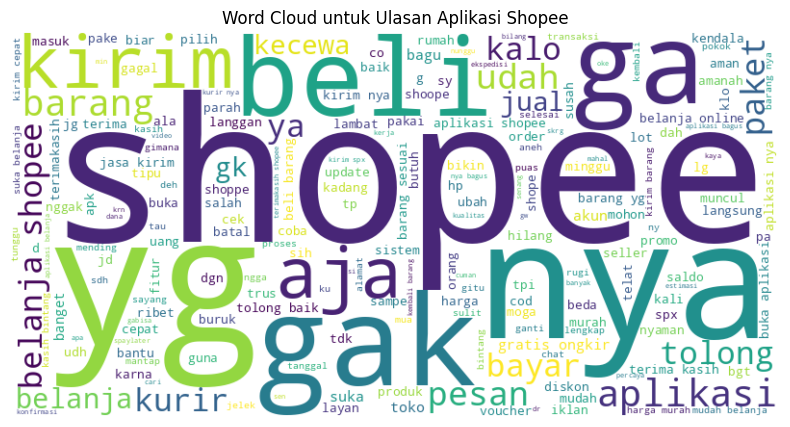

In [33]:
# Langkah 16: Visualisasi Word Cloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Menggabungkan semua ulasan yang telah diproses
all_reviews = ' '.join(my_df['content_stemmed'])  # Gabungkan semua teks ulasan yang sudah diproses

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Ulasan Aplikasi Shopee')
plt.show()


Penjelasan:

- Word cloud membantu untuk melihat kata-kata yang sering muncul dalam ulasan, yang memberi indikasi tentang tema-tema sentimen yang dominan.

**Langkah 17: Visualisasi Confusion Matrix**

Confusion matrix digunakan untuk mengevaluasi seberapa baik model mengklasifikasikan kelas (Negatif, Netral, Positif). Ini akan memberikan gambaran tentang prediksi yang benar dan salah untuk setiap kelas.

75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


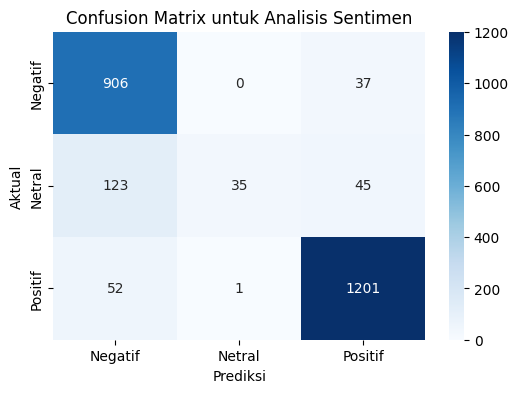

In [34]:
# Langkah 17: Visualisasi Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung confusion matrix
cm = confusion_matrix(y_test_encoded, model_cnn.predict(X_test).argmax(axis=1))

# Menampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Netral', 'Positif'], yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title('Confusion Matrix untuk Analisis Sentimen')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


Penjelasan:

- Confusion matrix memberikan informasi yang lebih detail tentang prediksi model pada setiap kelas.
- Heatmap digunakan untuk memvisualisasikan confusion matrix sehingga lebih mudah dipahami.

**Langkah 18: Menyimpan Model**

Setelah model selesai dilatih dan dievaluasi, kita dapat menyimpan model yang terbaik untuk digunakan di masa mendatang.

In [35]:
# Langkah 18: Menyimpan Model
model_cnn.save('sentiment_analysis_model_cnn.h5')
print("Model CNN telah disimpan!")


Model CNN telah disimpan!


Penjelasan:

- Model disimpan dalam format .h5 untuk digunakan di masa mendatang, seperti melakukan prediksi pada data baru.

**Langkah 19: Memuat Model dan Prediksi**

Setelah model disimpan, kita dapat memuat model yang sudah disimpan dan menggunakannya untuk melakukan prediksi terhadap data baru.

In [36]:
# Langkah 19: Memuat Model dan Prediksi
from tensorflow.keras.models import load_model

# Memuat model yang telah disimpan
loaded_model = load_model('sentiment_analysis_model_cnn.h5')

# Melakukan prediksi pada ulasan baru
sample_review = ["Produk Shopee sangat memuaskan! Pengiriman cepat dan aman."]
sample_review_seq = tokenizer.texts_to_sequences(sample_review)
sample_review_pad = pad_sequences(sample_review_seq, padding='post', maxlen=100)

predictions = loaded_model.predict(sample_review_pad)
predicted_class = encoder.inverse_transform(predictions.argmax(axis=1))

print(f"Prediksi Sentimen: {predicted_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Prediksi Sentimen: Positif


Penjelasan:

- load_model() digunakan untuk memuat kembali model yang telah disimpan sebelumnya.
- Setelah model dimuat, Anda dapat menggunakan model untuk memprediksi sentimen dari teks ulasan baru.
- Output dari model adalah kelas prediksi yang menunjukkan sentimen ulasan (Positif, Netral, Negatif).

**Langkah 20: Menghasilkan Dataset Hasil Scraping dalam Format CSV**

Jika Anda ingin menyimpan dataset hasil scraping yang telah diproses dalam format CSV untuk digunakan lebih lanjut, berikut adalah kode untuk menyimpan dataset:


In [37]:
# Langkah 20: Menyimpan Dataset Hasil Scraping ke CSV
my_df.to_csv('shopee_reviews.csv', index=False)
print("Dataset telah disimpan dalam format CSV!")


Dataset telah disimpan dalam format CSV!


Penjelasan:

- to_csv() digunakan untuk menyimpan dataset yang sudah diproses ke dalam file CSV.
- File CSV ini dapat digunakan untuk analisis lebih lanjut atau untuk dibagikan dengan pihak lain yang membutuhkan dataset yang sama.


# **Kesimpulan**
Proyek ini bertujuan untuk melakukan analisis sentimen pada ulasan pengguna aplikasi Shopee yang diambil dari Google Play Store menggunakan teknik-teknik pemrosesan teks dan model deep learning. Dengan langkah-langkah yang sistematis, kita berhasil membangun dan mengevaluasi tiga model untuk menentukan kinerja terbaik dalam mengklasifikasikan ulasan sebagai Positif, Netral, atau Negatif.

Proses Utama:
1. Pengambilan Data:

- Data ulasan aplikasi Shopee berhasil diambil menggunakan library google-play-scraper, yang menyediakan data ulasan dalam bahasa Indonesia sebanyak 12.000 ulasan. Data ini kemudian diproses lebih lanjut.
Pembersihan dan Preprocessing Teks:

2. Case Folding: Mengubah semua teks menjadi huruf kecil untuk menghindari inkonsistensi.
- Pembersihan Teks: Menghapus URL dan karakter non-alfanumerik.
- Penghapusan Stopwords: Menghapus kata-kata yang tidak memberikan informasi penting, seperti kata sambung dan preposisi.
- Tokenisasi: Memecah teks menjadi kata-kata terpisah untuk memudahkan pemrosesan lebih lanjut.
- Stemming: Menggunakan algoritma Sastrawi untuk mengubah kata menjadi bentuk dasar, seperti "berlari" menjadi "lari".

3. Pelabelan Data:
- Ulasan dilabeli berdasarkan skor (rating): skor < 3 dianggap Negatif, skor = 3 dianggap Netral, dan skor > 3 dianggap Positif.

4. Model Pembelajaran Mesin:

- LSTM (Long Short-Term Memory): Model deep learning pertama yang digunakan, dengan pendekatan Bidirectional LSTM untuk menangkap konteks dari dua arah. - - Model ini memberikan akurasi sekitar 49.23% pada data uji.
- GRU (Gated Recurrent Unit): Model alternatif yang lebih efisien daripada LSTM, tetapi memberikan hasil yang serupa.
- CNN (Convolutional Neural Network): Meskipun lebih sering digunakan dalam pengolahan citra, model CNN juga berhasil diterapkan dalam analisis sentimen teks, dengan akurasi tertinggi 89.25% pada data uji.

5. Evaluasi Model:

- Model CNN menunjukkan performa terbaik dengan akurasi 89.25%, diikuti oleh model LSTM dan GRU yang memberikan hasil lebih rendah.
- Confusion Matrix memberikan wawasan mendalam mengenai kesalahan klasifikasi model, dan Word Cloud membantu untuk melihat kata-kata yang paling sering muncul dalam ulasan pengguna.
6.  Prediksi Sentimen:
- Model CNN yang telah dilatih kemudian digunakan untuk memprediksi sentimen ulasan baru, yang menunjukkan bahwa model dapat mengenali sentimen dengan baik (contoh ulasan "Produk Shopee sangat memuaskan! Pengiriman cepat dan aman" diprediksi sebagai Positif).

7. Menyimpan Model dan Dataset:

- Model terbaik (CNN) disimpan dalam format .h5, memungkinkan pengguna untuk memuat dan menggunakannya untuk prediksi lebih lanjut tanpa perlu melatih ulang.
- Dataset hasil scraping disimpan dalam format CSV, sehingga dapat digunakan untuk analisis lebih lanjut atau dibagikan kepada pihak lain.


**Kesimpulan Umum:**

Proyek ini berhasil menerapkan berbagai teknik pemrosesan teks untuk mengolah data ulasan aplikasi Shopee dan membangun tiga model deep learning untuk analisis sentimen. Dari ketiga model yang diuji, CNN terbukti memberikan hasil terbaik, menunjukkan bahwa CNN bisa menjadi pilihan yang baik untuk analisis sentimen teks meskipun lebih dikenal di bidang pengolahan citra. Evaluasi model dengan menggunakan Confusion Matrix dan Word Cloud memberikan gambaran yang jelas tentang kekuatan dan kelemahan model dalam klasifikasi sentimen. Penyimpanan model dan dataset dalam format yang sesuai memungkinkan analisis lebih lanjut dan penerapan model dalam aplikasi nyata.